# Bursa Kiralık Ev Tahminlemesi

## Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max.columns',None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


## İnternet Sitesinden Veri Çekmek

In [4]:
url="https://www.hepsiemlak.com/bursa-kiralik" # gitmek istediğimiz adres
response=requests.get(url)

In [5]:
soup=BeautifulSoup(response.text, "html.parser")

In [6]:
price = soup.findAll("div",{"class":"list-view-price"}) 
viewsize = soup.findAll("span", {"class":"list-view-size"})
age = soup.findAll("span", {"class":"buildingAge"})
room = soup.findAll("span", {"class":"houseRoomCount"})
floortype = soup.findAll("span", {"class":"floortype"})
location = soup.findAll("div",{"class":"list-view-location"})

## Veri Seti Haline Getirmek

In [7]:
p_list = []
v_list = []
a_list = []
r_list = []
f_list = []
l_list = []
columns=["price", "viewsize", "age", "room", "floortype", "location"]
for i in range(2,195):
    url_="https://www.hepsiemlak.com/bursa-kiralik?page={}".format(i)
    response=requests.get(url)
    soup=BeautifulSoup(response.text, "html.parser")
    soup.beautify
    price = soup.findAll("div",{"class":"list-view-price"})
    viewsize = soup.findAll("span", {"class":"list-view-size"})
    age = soup.findAll("span", {"class":"buildingAge"})
    room = soup.findAll("span", {"class":"houseRoomCount"})
    floortype = soup.findAll("span", {"class":"floortype"})
    location = soup.findAll("div",{"class":"list-view-location"})
    for (p1, r1, v1, a1, f1, l1) in zip(price, viewsize, age, room, floortype, location):
        p_list.append(p1.text)
        v_list.append(r1.text)
        a_list.append(v1.text)
        r_list.append(a1.text)
        f_list.append(f1.text)
        l_list.append(l1.text)
    

In [8]:
p3 = {"Price":p_list,  "View Size":v_list, "Age":a_list, "Room":r_list, "Floortype":f_list, "Location":l_list}
df = pd.DataFrame(p3)
df

,Price,View Size,Age,Room,Floortype,Location
0,\n 2.500\n TL,\n 100 m2,25 Yaşında,2 + 1,\n 5. Kat,"\n Mudanya,\n ..."
1,\n 3.500\n TL,\n 140 m2,1 Yaşında,3 + 1,\n 3. Kat,"\n Nilüfer,\n ..."
2,\n 7.900\n TL,\n 160 m2,4 Yaşında,3 + 1,\n 3. Kat,"\n Nilüfer,\n ..."
3,\n 4.000\n TL,\n 300 m2,15 Yaşında,5 + 1,\n En Üst Kat,"\n Nilüfer,\n ..."
4,\n 2.500\n TL,\n 80 m2,8 Yaşında,2 + 1,\n 3. Kat,"\n Nilüfer,\n ..."
...,...,...,...,...,...,...
4627,\n 1.850\n TL,\n 65 m2,10 Yaşında,2 + 1,\n 4. Kat,"\n Nilüfer,\n ..."
4628,\n 2.200\n TL,\n 55 m2,2 Yaşında,1 + 1,\n Çatı Katı,"\n Nilüfer,\n ..."
4629,\n 3.000\n TL,\n 55 m2,Sıfır Bina,1 + 1,\n 1. Kat,"\n Nilüfer,\n ..."
4630,\n 7.000\n TL,\n 140 m2,Sıfır Bina,3 + 1,\n 10. Kat,"\n Nilüfer,\n ..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4632 entries, 0 to 4631
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      4632 non-null   object
 1   View Size  4632 non-null   object
 2   Age        4632 non-null   object
 3   Room       4632 non-null   object
 4   Floortype  4632 non-null   object
 5   Location   4632 non-null   object
dtypes: object(6)
memory usage: 217.2+ KB


In [10]:
df.to_csv('BursaEvTahmini.csv') 

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv('BursaEvTahmini.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4632 entries, 0 to 4631
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4632 non-null   int64 
 1   Price       4632 non-null   object
 2   View Size   4632 non-null   object
 3   Age         4632 non-null   object
 4   Room        4632 non-null   object
 5   Floortype   4632 non-null   object
 6   Location    4632 non-null   object
dtypes: int64(1), object(6)
memory usage: 253.4+ KB


In [14]:
del df['Unnamed: 0']

In [15]:
df.head()

,Price,View Size,Age,Room,Floortype,Location
0,\n 2.500\n TL,\n 100 m2,25 Yaşında,2 + 1,\n 5. Kat,"\n Mudanya,\n ..."
1,\n 3.500\n TL,\n 140 m2,1 Yaşında,3 + 1,\n 3. Kat,"\n Nilüfer,\n ..."
2,\n 7.900\n TL,\n 160 m2,4 Yaşında,3 + 1,\n 3. Kat,"\n Nilüfer,\n ..."
3,\n 4.000\n TL,\n 300 m2,15 Yaşında,5 + 1,\n En Üst Kat,"\n Nilüfer,\n ..."
4,\n 2.500\n TL,\n 80 m2,8 Yaşında,2 + 1,\n 3. Kat,"\n Nilüfer,\n ..."


In [16]:
df.shape

(4632, 6)

In [17]:
df.describe()

,Price,View Size,Age,Room,Floortype,Location
count,4632,4632,4632,4632,4632,4632
unique,17,17,13,6,14,21
top,\n 2.500\n TL,\n 140 m2,Sıfır Bina,2 + 1,\n 3. Kat,"\n Nilüfer,\n ..."
freq,772,579,1158,1930,965,579


## Feature Engineering

In [18]:
df['Price'] = df['Price'].str.replace('TL','')
df['Price'] = df['Price'].str.replace('\n','')
df['Price'] = df['Price'].str.split('.')
newlist = [int("".join(x).strip()) for x in df['Price']]
df['Price'] = newlist

<AxesSubplot:xlabel='Price', ylabel='Density'>

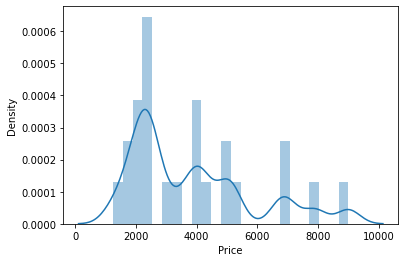

In [19]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price'>

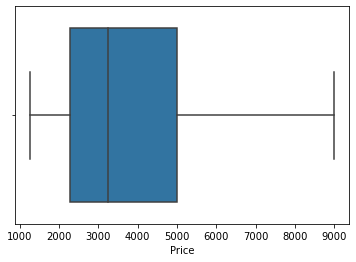

In [20]:
sns.boxplot(df['Price'])

In [21]:
df['Room'].replace("Stüdyo","1", inplace=True)
df['Room'].unique()
df['Room'] = [eval(x) for x in df['Room']] 
df['Room'].unique()

array([3, 4, 6, 5, 2])

<AxesSubplot:xlabel='Room', ylabel='Density'>

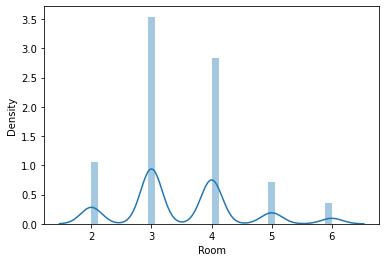

In [22]:
sns.distplot(df['Room'])

<AxesSubplot:xlabel='Room'>

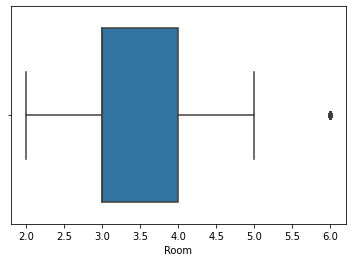

In [23]:
sns.boxplot(df['Room'])

In [24]:
outliers = df.quantile(.97)
df = df[(df['Room']<outliers['Room'])]

In [25]:
df['View Size']

0       \n                          100 m2
1       \n                          140 m2
2       \n                          160 m2
4        \n                          80 m2
5       \n                          350 m2
                       ...                
4627     \n                          65 m2
4628     \n                          55 m2
4629     \n                          55 m2
4630    \n                          140 m2
4631    \n                          200 m2
Name: View Size, Length: 4439, dtype: object

In [26]:
df['View Size'] = df['View Size'].str.replace('\n','')
df['View Size'] = df['View Size'].str.replace(' m2','')
df['View Size'] = df['View Size'].astype('int64')

<AxesSubplot:xlabel='View Size', ylabel='Density'>

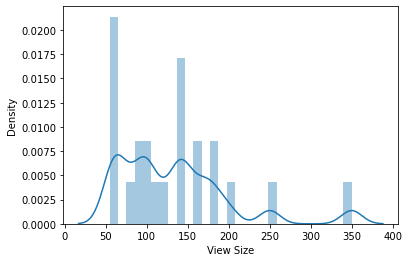

In [27]:
sns.distplot(df['View Size'])

<AxesSubplot:xlabel='View Size'>

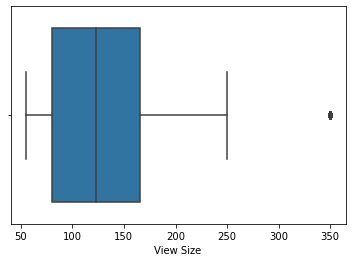

In [28]:
sns.boxplot(df['View Size'])

In [29]:
outliers = df.quantile(.97)
df = df[(df['View Size']<outliers['View Size'])] # Getting rid of outliers

In [30]:
df['Age'].unique()

array(['25 Yaşında', '1 Yaşında', '4 Yaşında', '8 Yaşında', '30 Yaşında',
       'Sıfır Bina', '22 Yaşında', '9 Yaşında', '2 Yaşında', '10 Yaşında',
       '20 Yaşında'], dtype=object)

In [31]:
df['Age'] = df['Age'].str.extract('(\d+)');

In [32]:
df['Age'].fillna(0, inplace=True)
df['Age'] = df['Age'].astype('float64')

<AxesSubplot:xlabel='Age', ylabel='Density'>

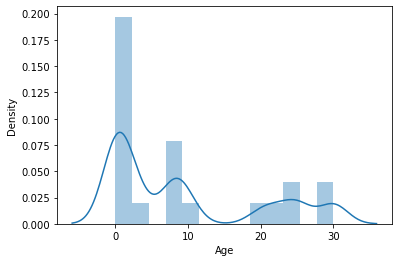

In [33]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Age'>

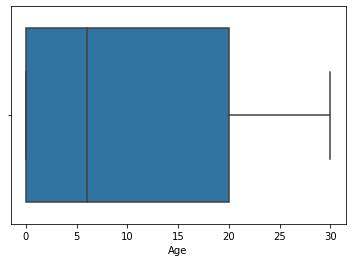

In [34]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

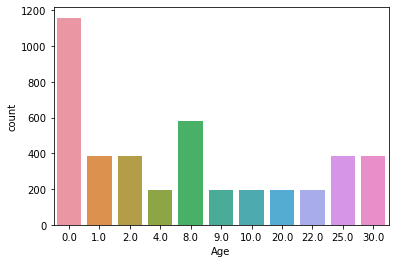

In [35]:
sns.countplot(df['Age'])

In [36]:
outliers = df.quantile(.97)

In [37]:
df = df[(df['Age']<outliers['Age'])]

In [38]:
df['Floortype'] = df['Floortype'].str.replace("\n","")

In [39]:
df['Floortype'] = df['Floortype'].str.strip()

In [40]:
df.replace(' Zemin', "0", inplace=True)

df.replace(' Ara Kat', "2", inplace=True)

df.replace(' Yüksek Giriş', "1", inplace=True)

df.replace(' Giriş Katı', "0", inplace=True)

df.replace(' Çatı Katı', "3", inplace=True)

df.replace(' Teras Katı', "3", inplace=True)

df.replace(' En Üst Kat', "3", inplace=True)

df.replace(' Çatı', "3", inplace=True)

df.replace(' Teraı', "3", inplace=True)

df.replace(' Ar', "2", inplace=True)

df.replace(' Bahçı', "0", inplace=True)

df['Floortype'] = df['Floortype'].str.extract('(\d+)');

df['Floortype'].fillna(2, inplace=True)

df['Floortype'] = df['Floortype'].astype('int64')

<AxesSubplot:xlabel='Floortype', ylabel='count'>

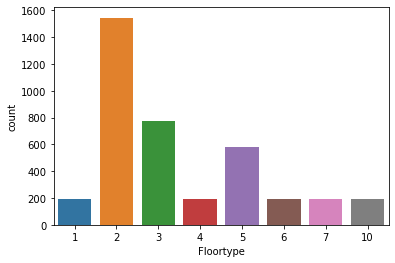

In [41]:
sns.countplot(df['Floortype'])

In [42]:
df['Location'].unique()

array(['\n                      Mudanya,\n                     \n                      Güzelyalı Yalı Mahallesi\n                    ',
       '\n                      Nilüfer,\n                     \n                      30 Ağustos Zafer Mahallesi\n                    ',
       '\n                      Nilüfer,\n                     \n                      Ahmet Yesevi Mahallesi\n                    ',
       '\n                      Nilüfer,\n                     \n                      Görükle Mahallesi\n                    ',
       '\n                      Nilüfer,\n                     \n                      Dumlupınar Mahallesi\n                    ',
       '\n                      Gemlik,\n                     \n                      Hisar Mahallesi\n                    ',
       '\n                      Yıldırım,\n                     \n                      Karaağaç Mahallesi\n                    ',
       '\n                      İnegöl,\n                     \n          

In [43]:
df['Location'] = [x.split(",")[0] for x in df['Location']]
df['Location'] = df['Location'].str.replace("\n","")
df['Location'] = df['Location'].str.strip()
df['Location'] = df['Location'].astype('category') # Turning into category variable 

In [44]:
df.sample(10)

,Price,View Size,Age,Room,Floortype,Location
2011,1850,65,10.0,3,4,Nilüfer
303,1700,140,9.0,4,2,Mudanya
1418,7900,160,4.0,4,3,Nilüfer
4052,2200,55,2.0,2,2,Nilüfer
1666,4400,90,8.0,3,2,İnegöl
4056,2500,100,25.0,3,5,Mudanya
1176,2500,100,25.0,3,5,Mudanya
2324,2200,55,2.0,2,2,Nilüfer
4555,1850,65,10.0,3,4,Nilüfer
3113,5000,145,1.0,4,7,Nilüfer


<AxesSubplot:xlabel='Location', ylabel='Price'>

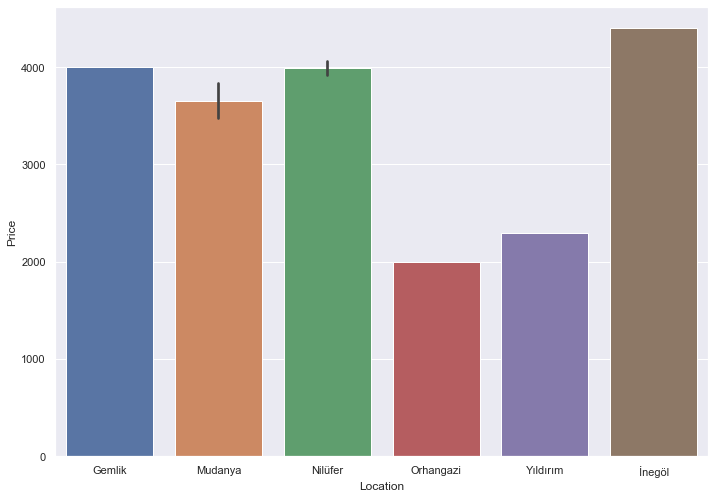

In [45]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x=df['Location'], y=df['Price'])

In [46]:
X = df[['Room', 'View Size', 'Floortype', 'Location','Age']]

y = df['Price']

In [47]:
X=pd.get_dummies(X,drop_first=True) 

## Modelleme

### Machine Learning

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import ExtraTreeRegressor,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [49]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=18)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3088, 9), (772, 9), (3088,), (772,))

In [51]:
new = X.join(y)
abs(new.corr()['Price']).sort_values(ascending=False) 

Price                 1.000000
View Size             0.599899
Floortype             0.462895
Room                  0.385665
Location_Orhangazi    0.224842
Location_Yıldırım     0.186894
Location_Nilüfer      0.161405
Location_İnegöl       0.078742
Age                   0.058092
Location_Mudanya      0.029532
Name: Price, dtype: float64

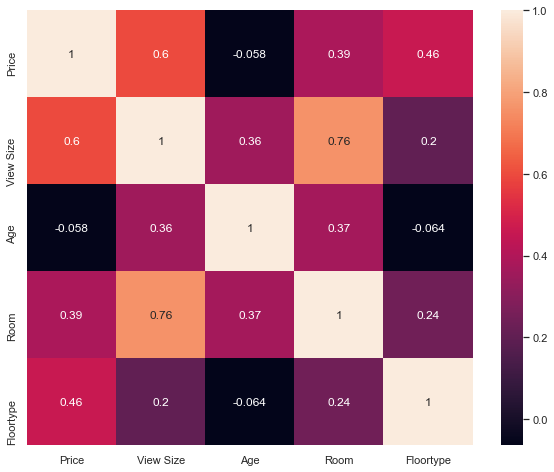

In [52]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(),annot = True);

In [53]:
R=Ridge()
L=Lasso()
Lr=LinearRegression()
Etr=ExtraTreeRegressor()
Dtr=DecisionTreeRegressor()
Knn=KNeighborsRegressor()
Gbr=GradientBoostingRegressor()

In [54]:
from sklearn.linear_model import ElasticNet

In [55]:
E = ElasticNet()

In [56]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score
def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits=10,shuffle=True,random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [57]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
Lr = LinearRegression(normalize=True, n_jobs=-1)

In [58]:
test_model(Lr)

[0.6697696034913027]

In [59]:
Rdg = Ridge(alpha = 1e-4, normalize=True)
test_model(Rdg)

[0.6697717186017995]

In [60]:
Las = Lasso(alpha = 1e-4, normalize=True)
test_model(Las)

[0.6697697171242328]

In [61]:
from sklearn.tree import DecisionTreeRegressor
DCR = DecisionTreeRegressor(max_depth=5)

In [62]:
test_model(DCR)

[0.9897321643216269]

In [63]:
from sklearn.svm import SVR
Svm = SVR(kernel='rbf')

In [64]:
test_model(Svm)

[0.11023305877352621]

In [65]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'kernel': ['rbf'],
         'gamma': [1,0.1,0.01,0.001,0.0001,0.0002,0.0003,0.0004],
         'C': [0.1,1,10,20,100,1000],
         'epsilon': [1,0.2,0.1,0.01,0.001,0.02,0.003,0.004,0.005,0.006,0.007,0.008,0.0001]}

In [66]:
rand_search = RandomizedSearchCV(Svm , param_distributions=params , n_jobs=-1 , cv=11)
rand_search.fit(X_train,y_train)
rand_search.best_score_

0.9657788066929508

In [67]:
Svm2 = SVR(kernel='rbf',C= 20, epsilon= 0.008, gamma=0.0003)
test_model(Svm2)

[0.39887445716970593]

In [68]:
from sklearn.linear_model import ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [69]:
def algo_test(x, y):
    
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)
    
    algos = [L, E, R, Lass, ETR, GBR]
    algo_names= ['Linear', 'ElasticNet', 'Ridge', 'Lasso', 'Extra Tree', 'Gradient Boosting']
    r_squared = []
    rmse = []
    mae = []
    
    result = pd.DataFrame(columns = ['R_Squared', 'RMSE', 'MAE'],
                           index = algo_names)
    
    for algo in algos:
        algo.fit(X_train, y_train)
        algo.predict(X_test)
        
        r_squared.append(r2_score(y_test, algo.predict(X_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(X_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(X_test)))
        
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    return result.sort_values('R_Squared', ascending=False)

In [70]:
algo_test(X, y)

,R_Squared,RMSE,MAE
Extra Tree,1.000000,0.000000,0.000000
Gradient Boosting,0.999843,22.721960,19.518379
Linear,0.667224,1047.419396,733.803285
Lasso,0.667117,1047.587908,735.132793
Ridge,0.667095,1047.621665,734.658811
ElasticNet,0.557309,1208.077729,891.071514


### Deep Learning

In [71]:
import tensorflow as tf

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
model=Sequential()

model.add(Dense(30,activation="relu"))

model.add(Dense(25,activation="relu"))

model.add(Dense(20,activation="relu"))

model.add(Dense(20,activation="relu"))

model.add(Dense(10,activation="relu"))

model.add(Dense(1))

model.compile(loss="mse",optimizer="adam")

In [74]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),verbose=1,epochs=450)

Epoch 1/450
97/97 [==============================] - 3s 11ms/step - loss: 12061004.0000 - val_loss: 2432659.5000
Epoch 2/450
97/97 [==============================] - 1s 7ms/step - loss: 2306672.0000 - val_loss: 2235655.7500
Epoch 3/450
97/97 [==============================] - 1s 8ms/step - loss: 2131705.0000 - val_loss: 2102248.5000
Epoch 4/450
97/97 [==============================] - 1s 7ms/step - loss: 1996142.6250 - val_loss: 1971376.2500
Epoch 5/450
97/97 [==============================] - 1s 6ms/step - loss: 1872282.5000 - val_loss: 1827284.2500
Epoch 6/450
97/97 [==============================] - 1s 7ms/step - loss: 1767427.0000 - val_loss: 1743224.3750
Epoch 7/450
97/97 [==============================] - 1s 7ms/step - loss: 1681983.5000 - val_loss: 1650253.7500
Epoch 8/450
97/97 [==============================] - 1s 6ms/step - loss: 1623003.8750 - val_loss: 1585228.8750
Epoch 9/450
97/97 [==============================] - 1s 6ms/step - loss: 1569174.2500 - val_loss: 1530587.5000

In [77]:
kayip=pd.DataFrame(model.history.history)

<AxesSubplot:>

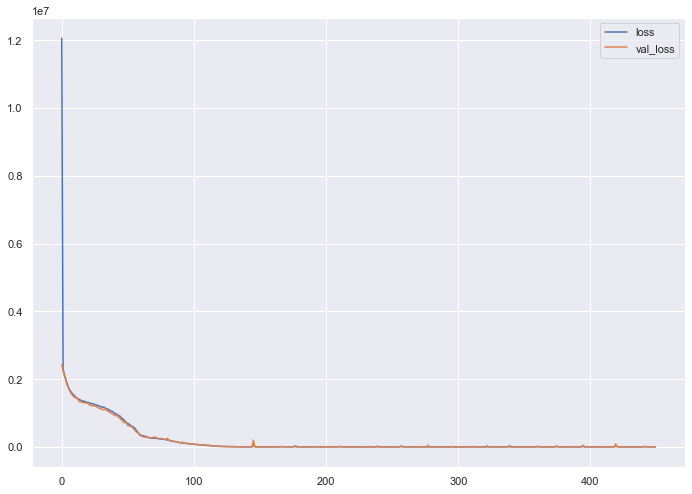

In [78]:
kayip.plot()

In [79]:
pre=model.predict(X_test)

In [80]:
r2_score(y_test,pre)

0.9999979903588673